<a href="https://colab.research.google.com/github/kyleegit27/wrangling_KL/blob/main/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

header ={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://miami.craigslist.org/search/miami-fl/boo?lat=25.73&lon=-80.529&query=jet%20skis&search_distance=31#search=1~gallery~0~0' #arlington toys & games on craigslist
raw = requests.get(url, headers = header) # get page

In [2]:
#use beautifulSoup and bs4 -- parse local page for specific results
#view page source (what computer reads)
#tags - give info on where data lives + how to extricate it
#takes raw content from requests, turns into beautifulSoup object+ search the page
from bs4 import BeautifulSoup as soup #HTML parser
obj = soup(raw.content, 'html.parser')#parse the HTML
listings = obj.find_all(class_ = 'cl-static-search-result') #finds all the listings wanted
#use .find_all function to search whole page
#use .find method to search within the listing record, but typically wrapped in a tag
#use .get_text() function
#split title words with title.split()



In [70]:
import re  # Regular expressions
import numpy as np  # Required for np.nan

brands = ['yamaha', 'sea-doo']

# Open data list
data = []

for k in range(len(listings)):
    title = listings[k].find('div', class_='title').get_text().lower()
    price = listings[k].find('div', class_='price').get_text()
    link = listings[k].find(href=True)['href']

    # Normalize "Sea-Doo" variations
    title = re.sub(r'\b(sea[\s-]?doo|seadoo)\b', 'sea-doo', title)

    # Retrieve brand
    words = title.split()
    hits = [brand for brand in brands if brand in words]
    brand = hits[0] if hits else 'misc'

    # Retrieve year from title
    regex_search = re.search(r'20[0-9]{2}|19[0-9]{2}', title)
    year = regex_search.group(0) if regex_search else np.nan

    data.append({'title': title, 'price': price, 'year': year, 'link': link, 'brands': brand})


In [77]:
#wrangle data...typcast/coerce, clean etc.
#put in dataframe
#data clean to include ... sea-doo same as sea doo
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors= 'coerce')
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')
df['age'] = 2025 - df['year']
print(df.shape)
df.tail(10)

(53, 6)


,title,price,year,link,brands,age
43,o'day 272 sailboat,5900,NaN,https://miami.craigslist.org/mdc/boa/d/north-m...,misc,NaN
44,boat names - graphics - stripes,0,NaN,https://miami.craigslist.org/mdc/boa/d/miami-b...,misc,NaN
45,2021 yamaha fx limited like new,11500,2021.0,https://miami.craigslist.org/mdc/boa/d/hialeah...,yamaha,4.0
46,sea-doo 2016 gts 130 se with 120 hours 2 key o...,5600,2016.0,https://miami.craigslist.org/mdc/boa/d/miami-b...,sea-doo,9.0
47,2023 sea-doo spark,5000,2023.0,https://miami.craigslist.org/mdc/boa/d/miami-2...,sea-doo,2.0
48,boat names - graphics - stripes,0,NaN,https://miami.craigslist.org/mdc/boa/d/miami-b...,misc,NaN
49,waverunner jetski vx ho,8500,NaN,https://miami.craigslist.org/mdc/boa/d/miami-w...,misc,NaN
50,2016 yamaha vx cruiser ho,6955,2016.0,https://miami.craigslist.org/brw/bod/d/hollywo...,yamaha,9.0
51,2019 scarab 255 g,58555,2019.0,https://miami.craigslist.org/brw/bod/d/hollywo...,misc,6.0
52,2023 yamaha vx cruiser three seat jet ski 350 ...,3950,2023.0,https://miami.craigslist.org/brw/boa/d/fort-la...,yamaha,2.0


count       53.000000
mean      7914.264151
std      11083.774951
min          0.000000
25%       1600.000000
50%       3950.000000
75%       7500.000000
max      58555.000000
Name: price, dtype: float64


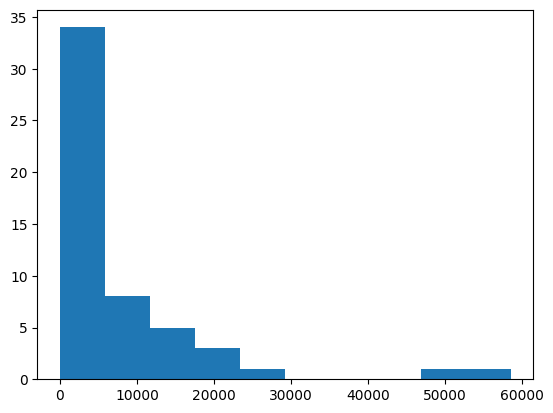

count    35.000000
mean      7.828571
std       7.249688
min       1.000000
25%       2.000000
50%       7.000000
75%      10.500000
max      24.000000
Name: age, dtype: float64


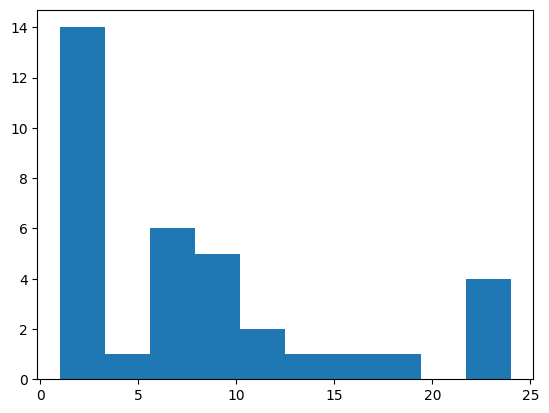

In [72]:
#explore data frame
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [73]:
#further exploration...types + price
df.loc[:, ['price', 'brands']].groupby('brands').describe()


price                                                             \
        count         mean           std    min     25%     50%      75%   
brands                                                                     
misc     16.0  8806.562500  17840.014641    0.0   950.0  1275.0   6300.0   
sea-doo  19.0  7763.210526   6635.232915    1.0  3950.0  4900.0  10250.0   
yamaha   18.0  7280.555556   6865.672258  250.0  3950.0  3950.0  10487.5   

                  
             max  
brands            
misc     58555.0  
sea-doo  23000.0  
yamaha   29000.0

In [74]:
#age by types
df.loc[:, ['age', 'brands']].groupby('brands').describe()


age                                                  
        count       mean       std  min   25%   50%   75%   max
brands                                                         
misc      3.0  16.000000  8.888194  6.0  12.5  19.0  21.0  23.0
sea-doo  17.0   7.882353  7.639391  1.0   1.0   7.0  11.0  24.0
yamaha   15.0   6.133333  5.680376  2.0   2.0   4.0   7.5  22.0

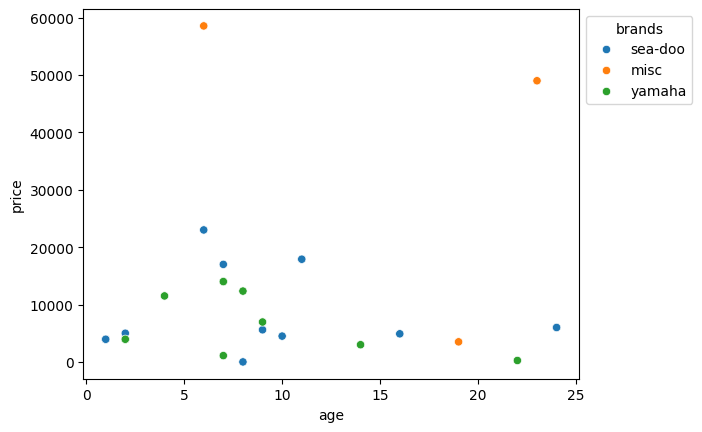

In [75]:
#another plot
ap = sns.scatterplot(data = df, x='age', y ='price', hue='brands')
sns.move_legend(ap, 'upper left', bbox_to_anchor = (1,1)) #bbox to anchor places lenged inside/outside the plot


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           log_price   log_age
log_price   2.607975  0.059863
log_age     0.059863  1.154858
           log_price   log_age
log_price   1.000000  0.031412
log_age     0.031412  1.000000


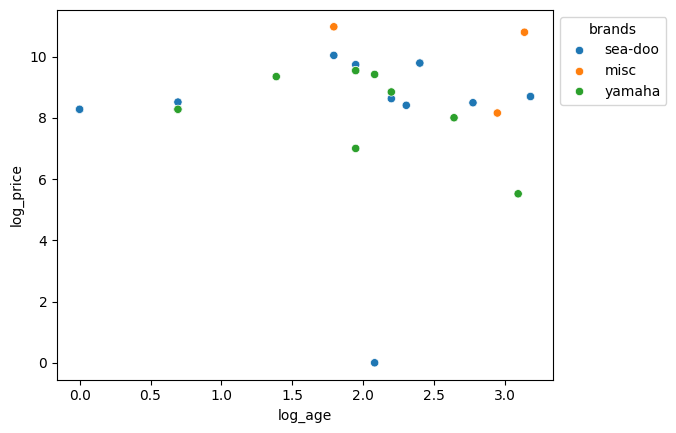

In [76]:
#plot of different trend/relationship
#use log to show price
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

log_plot = sns.scatterplot(data = df, x = 'log_age', y = 'log_price', hue = 'brands')
sns.move_legend(log_plot, 'upper left', bbox_to_anchor = (1,1))


print(df.loc[:, ['log_price', 'log_age']].cov())
print(df.loc[:, ['log_price', 'log_age']].corr())